# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능, 임의로 설정됨), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

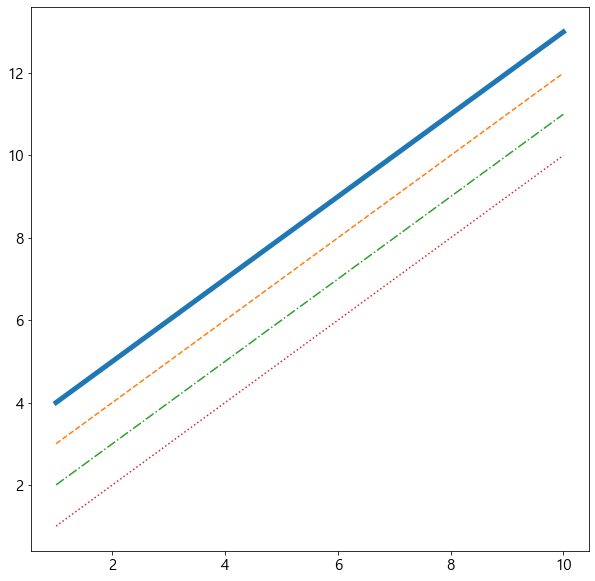

In [69]:
x = np.linspace(1,10, num = 100)

plt.figure(figsize = (10,10))
#x,y 값
plt.plot(x,x+3, linestyle ='-', linewidth = 5)  # '-' =  defalut// linewidth --> 굵기 
plt.plot(x,x+2, linestyle ='--')
plt.plot(x,x+1, linestyle ='-.')
plt.plot(x,x, linestyle = ':')

plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [70]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [71]:
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


In [72]:
#df.rename({'최대농도(㎍/㎥/시)':'최대농도'},axis =1 inplace = True)

In [73]:
df=df.rename({df.columns[-1]:'최대농도'},axis = 1)

In [74]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


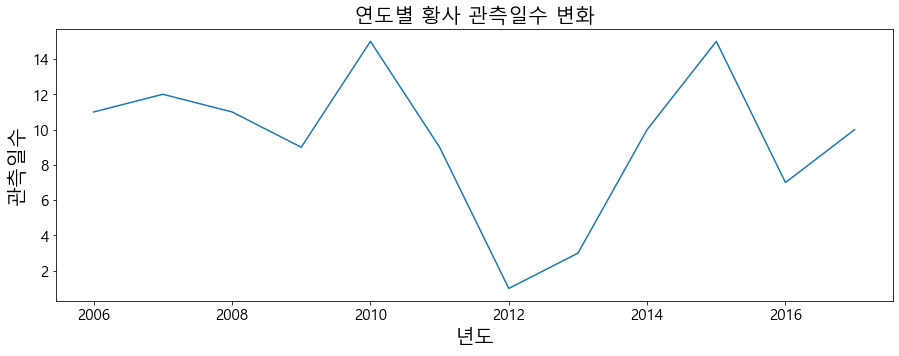

In [75]:
%matplotlib inline
#%matplotlib qt
# 년도에 따른 관측 일수의 변화흐름
plt.figure(figsize = (15,5))   # size에 따라 느낌// 변화폭이 달라 보인다.
# x : 시간 - 년도  ,, y : 관측일수 
plt.plot(df['년도'], df ['관측일수'])
plt.title('연도별 황사 관측일수 변화')
plt.xlabel('년도')
plt.ylabel('관측일수')

plt.show()

In [76]:
#df['년도']  시리즈 로 반환 된 값 // 같은 인덱스 끼리 (x,y) 가된다.
#df ['관측일수']

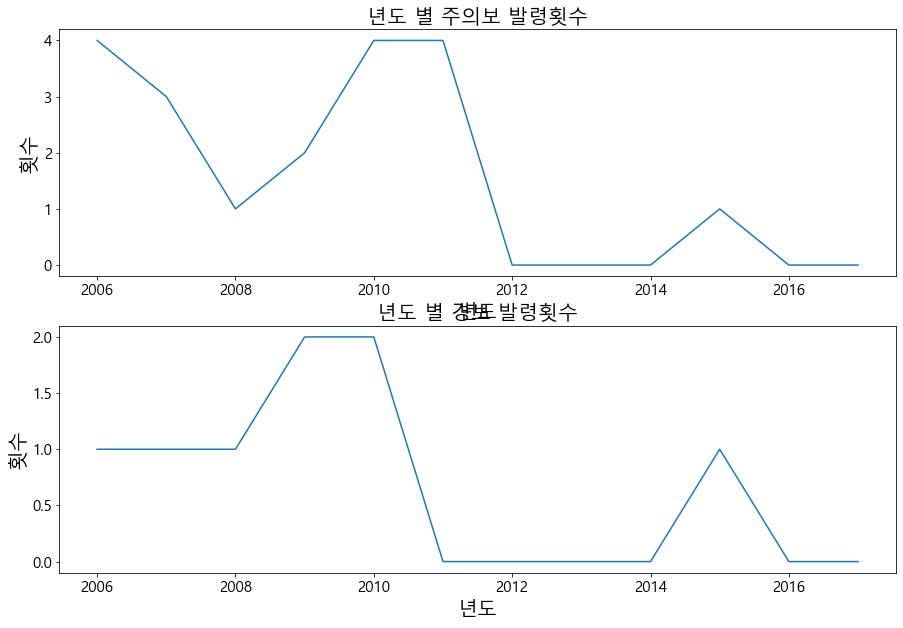

In [77]:
# 년도에 따른 주의보와 경보 발령횟수의 변화의 흐름을 하나의 figure에 그리기.
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(df['년도'],df['주의보 발령횟수'])
plt.title('년도 별 주의보 발령횟수')
plt.xlabel('년도')
plt.ylabel('횟수')

plt.subplot(2,1,2)
plt.plot(df['년도'],df['경보 발령횟수'])
plt.title('년도 별 경보 발령횟수')
plt.xlabel('년도')
plt.ylabel('횟수')

plt.show()

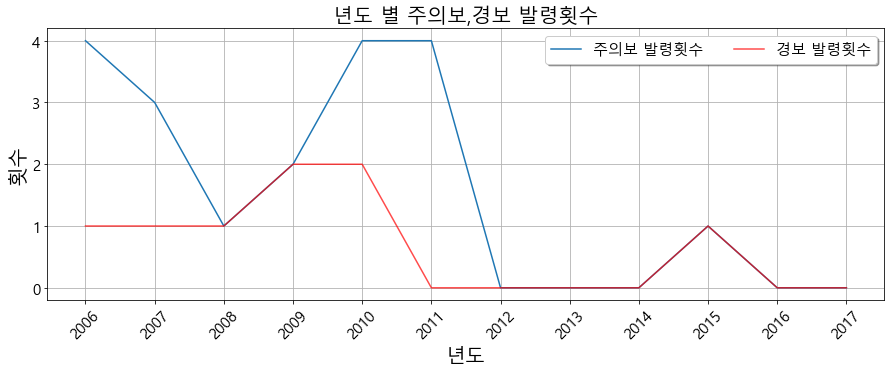

In [78]:
# 하나의 axes 에 두개 그리기
# legend 사용하실때는 그래프 그릴때 label을 지정하셔야 해요. plt.plot(....., label='이름') 이렇게요.

plt.figure(figsize=(15,5))

plt.plot(df['년도'],df['주의보 발령횟수'],label ='주의보 발령횟수') # 먼저 그리고 (blue)
plt.plot(df['년도'],df['경보 발령횟수'], label ='경보 발령횟수', color= 'r', alpha =0.7)   # 나중 (yellow) 색깔 덮임// 투명도를 조절 해결 0:투명 ~1:불투명

#ticks 설정
plt.xticks(df['년도'], rotation = 45)  # 년도 Series 다 써라/   /rotation : tick 값을 기울여서 이름이 겹치는 것을 해결해준다.
plt.yticks(range(0,5))  # [0,1,2,3,4]  --> 그냥 list로 다넣어도 된다.# 원래의 값과 다른 tick을 넣으면 형태가 깨짐# 원래값과 어느정도 맞춰서 넣어줘야한다.


plt.title('년도 별 주의보,경보 발령횟수')
plt.xlabel('년도')
plt.ylabel('횟수')

plt.legend(fontsize =15, fancybox = True, shadow = True, ncol= 2)  # 각각의 plot에 label 을 줘야 사용가능// 설정파일변경으로 글자크기 조정도가능~!
plt.grid(True)

plt.show()

In [79]:
df['주의보 발령횟수'].unique()

array([4, 3, 1, 2, 0], dtype=int64)

In [80]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사  ---> axes를 갖고 쓰기 때문에 plt.plot로는 할 수 없다.
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사
    
    
- ### 객체로 그래프를 그리는 방법으로만 할 수있다.
- #### 공유할 축의 axes.twinx()/ axes.twiny() 를 복사해야하기 때문에 변수에 넣어 객체를 생성해야하기 때문에

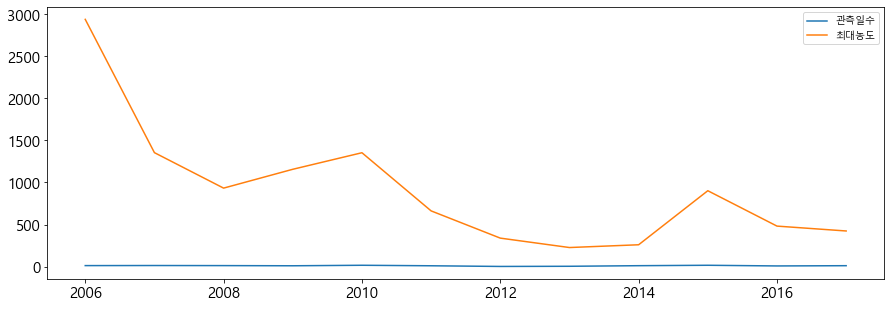

In [81]:
plt.figure(figsize=(15,5))

plt.plot(df['년도'],df['관측일수'], label ='관측일수') 
plt.plot(df['년도'],df['최대농도'], label ='최대농도') 

plt.legend()
plt.show()

In [82]:
#관측일수	최대농도 두개의 범위가 너무 차이가 많이 난다.  x 축을 공유하지만 2개의 y 축을 갖는 그래프  

### 객체로 그래프를 그리는 방법으로만 할 수있다.
#### 공유할 축의 axes.twinx()/ axes.twiny() 를 복사해야하기 때문에 변수에 넣어 객체를 생성해야하기 때문에 

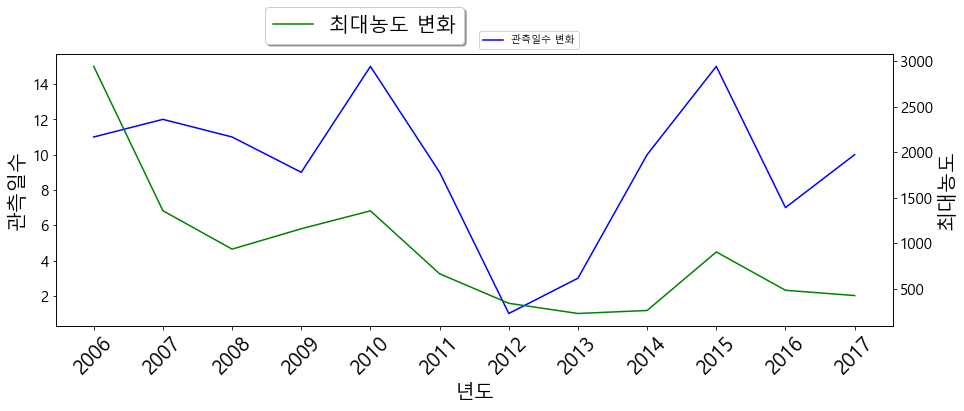

In [87]:
fig, ax1 = plt.subplots(figsize = (15,5)) # 행, 열의 개수를 생략---> axes(subplot) 1개  /// 예를 들어 (2,2) 등으로 하면 4개로 ndarray 가 생김
# print=(type(ax)) 
# 복사한것을 따로 그려서 겹친다는 개념으로 생각해야 이해하기 쉬움

ax2 = ax1.twinx()  # x를 공유하는 # L 이모양이 ax1 이다.

ax1.plot(df['년도'],df['관측일수'], label ='관측일수 변화', color ='b') 
ax2.plot(df['년도'],df['최대농도'], label = '최대농도 변화', color ='g',alpha= 1)
# ax2.plot(df['년도'],df['최대농도'], label = '최대농도 변화i', color ='k')
# ax2.plot(df['년도'],df['최대농도'], label = '최대농도 변화y', color ='g')
# 2개의 subplot을 합친것이기 때문에 plot 색이 같은색으로 나온다./ 구분하기위해 색깔 바꿔줘야한다.


# ax1.legend(loc = "upper left")  # 2개의 subplot을 합친것이기 때문에 legend 가 겹쳐서 하나만 보이는 것이다.// 레전드 위치를 따로 지정해주면 해결가능!
# ax2.legend(loc =  "upper right")
ax1.legend(bbox_to_anchor=(0.5,1), loc ='lower left')  # axes 밖에 legend box를 위치 시킬때
ax2.legend(bbox_to_anchor=(0.5,1), loc ='lower right',fontsize=20, fancybox = True,shadow = True)#, ncol= 2) 

ax1.set_xlabel('년도')
ax1.set_ylabel('관측일수')
ax2.set_ylabel('최대농도')

ax1.set_xticks(df['년도'])  # set 붙여줘야함
ax1.tick_params(axis ='x', labelrotation = 45, labelsize = 20)  ## 하나의 subplot 에 두개의 그래프를 그릴때는 xticks에 바로 rotation을 지정가능
# 하나의 축을 공유하고 공유한 축의 ticks를 설정할때는 이런식으로 해야함

plt.show()
# 

### legend box위치지정
- loc = '수직방향위치 수평방향위치'
    - axes box내에 legend box를 위치시킬때 사용
    - 수직방향위치 : lower, upper, 
    - 수평방향위치 : left, right, 
    - 정가운데 : center
    - 기본 : best --> default
- bbox_to_anchor, loc
    - axes box 밖에 legend box를 위치시킬때 사용.
    - bbox_to_anchor : 0~1 사이 실수 . legend box를 기준으로 axes box를 어디에 둘것인지를 지정. (x축위치, y축 위치)
    - loc : legend box를 기준으로 axes 의 어느위치에 놓을 것인지.

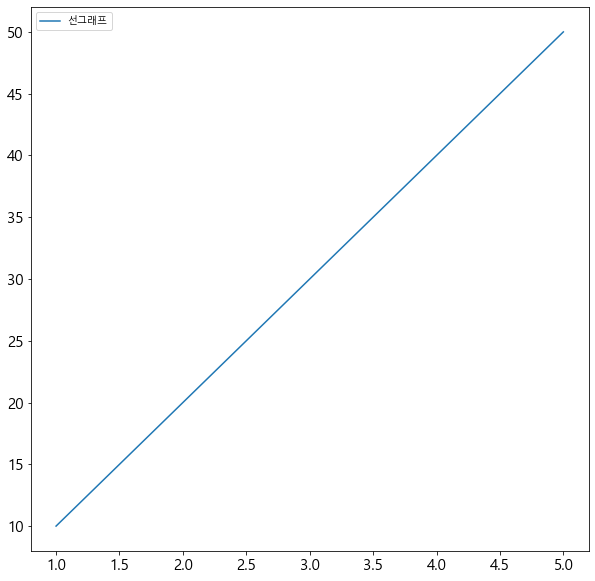

In [17]:
plt.figure(figsize=(10,10))

plt.plot([1,2,3,4,5],[10,20,30,40,50], label ='선그래프')

plt.legend(loc = 'upper left')
plt.show()

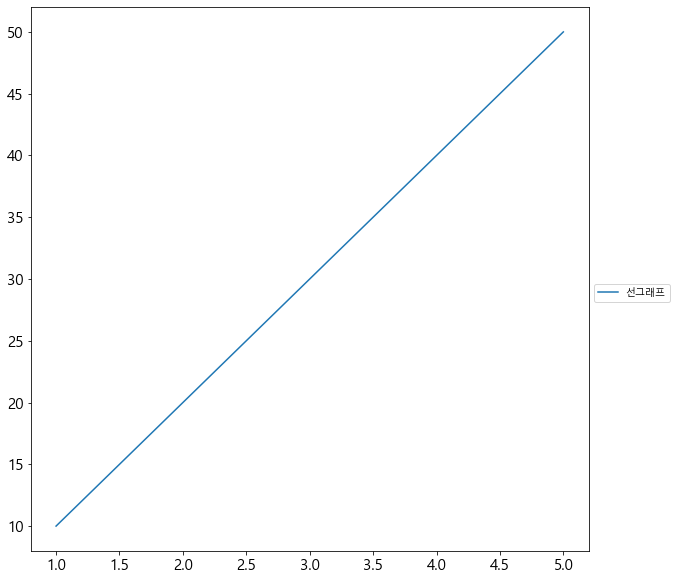

In [18]:
%matplotlib inline

plt.figure(figsize=(10,10))

plt.plot([1,2,3,4,5],[10,20,30,40,50], label ='선그래프')

#plt.legend(loc = 'upper left')
#plt.legend(bbox_to_anchor= (1,1), loc ='lower left')
plt.legend(bbox_to_anchor = (1,0.5), loc ='upper left')
plt.show()

#box의 loc을 anchor의 좌표에 놓는다고 생각하면 되겠네요!
# 박스를 기준으로 anchor (좌표)의 위치

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- 시간에 따른 변화를 볼수는 없다. // 표에 있는 순서대로 점이 찍히기때문에 다 이어서 선을 만들면 지그재그엉망진창이 된다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x = np.arange(1,1000,50)
y = np.arange(1,1000,50)
z = np.arange(1,1000,20)
a = np.random.normal(10,5, size = 20)
print(x.shape)
print(z.shape)
print(a)

(20,)
(50,)
[11.74599203 10.09067167 10.45119804 17.4962352   4.02266199 11.23644768
  6.55425458  5.5479653  10.65362656  6.09555793  7.43190712  6.90706041
  9.68270082  4.2748456  13.50504921 12.77528484 15.07763425 12.16054939
  6.49724901  8.57577354]


In [21]:
for d in zip(x,y):
    print(d)

(1, 1)
(51, 51)
(101, 101)
(151, 151)
(201, 201)
(251, 251)
(301, 301)
(351, 351)
(401, 401)
(451, 451)
(501, 501)
(551, 551)
(601, 601)
(651, 651)
(701, 701)
(751, 751)
(801, 801)
(851, 851)
(901, 901)
(951, 951)


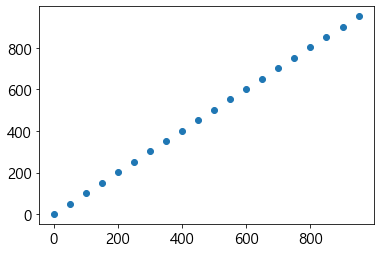

In [22]:
plt.scatter(x,y)
plt.show()

ValueError: x and y must be the same size

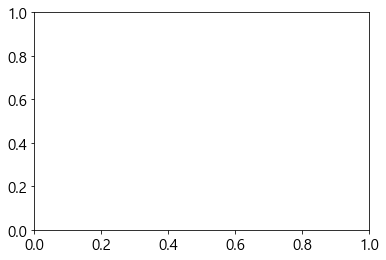

In [23]:
plt.scatter(x,z)
plt.show()  #ValueError: x and y must be the same size : x,z 축에 들어가는 값들의 개수가 다르다.// 같아야한다.

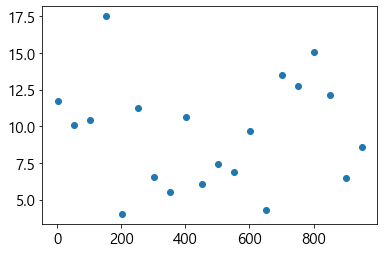

In [24]:
plt.scatter(x,a)
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/api/markers_api.html
- s
    - 마커의 크기
    
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

In [25]:
print(x)

[  1  51 101 151 201 251 301 351 401 451 501 551 601 651 701 751 801 851
 901 951]


In [26]:
x= np.random.randint(1,5,30)
x

array([4, 2, 4, 2, 2, 3, 1, 1, 2, 3, 2, 3, 1, 4, 2, 4, 4, 3, 2, 1, 3, 3,
       2, 2, 2, 2, 4, 3, 2, 3])

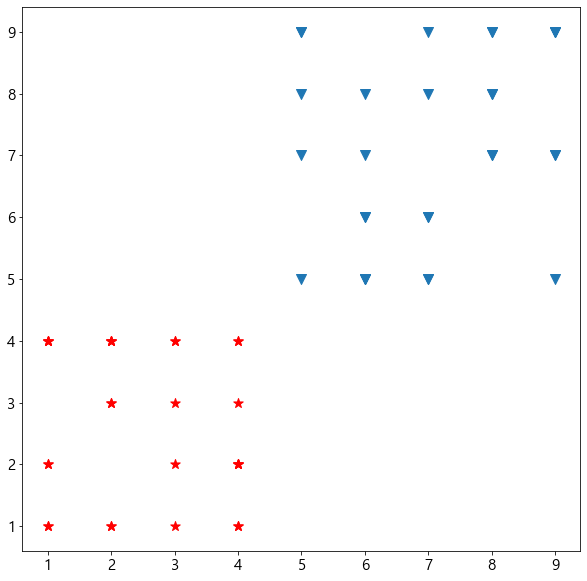

In [27]:
np.random.seed(0)
plt.figure(figsize=(10,10))

plt.scatter(x= np.random.randint(1,5,30), 
            y = np.random.randint(1,5,30),
           marker = '*',
           s = 100,
           color ='r')

plt.scatter(x = np.random.randint(5,10,30),
            y = np.random.randint(5,10,30),
            marker = 'v',
            s =100)
# 군집 분류
plt.show()

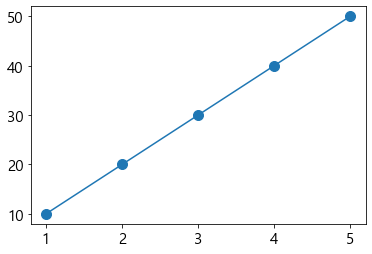

In [28]:
plt.plot([1,2,3,4,5],[10,20,30,40,50], marker = 'o', markersize = 10)
#plt.scatter([1,2,3,4,5],[10,20,30,40,50])
plt.show()

## 2.3 산점도 활용

In [29]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


### 경보 발령횟수와 관측일수 간의 관계

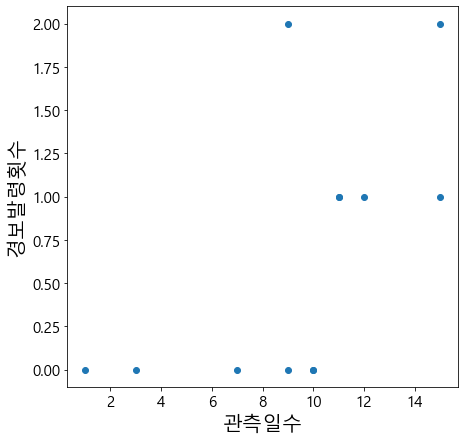

In [30]:
plt.figure(figsize=(7,7)) 
plt.scatter(df['관측일수'], df['경보 발령횟수'])
plt.xlabel('관측일수')
plt.ylabel('경보발령횟수')

plt.show()

In [31]:
import pandas as pd

- 상관계수 
    - 두변수(컬럼)간의 상관관계를 계산한 값.
    - 양의 상관관계: 변수 하나의 값이 증가할때 다른 하나도 같이 증가
        - 0~1  상관계수가 사이의 실수가 나온다.(양수) 
    - 음의 상관관계: 변수 하나의 값이 증가할 때 다른 하나는 감소 
        - -1~0 상관계수가 (음수)
    - numpy.corrcoef(변수 , 변수) - 변수는 array_like(배열, 리스트, Series)
    - pd.corr()    # 이부분 강의 보기 3교시임 
        - -1 ~ 1 
        - 1~ 0.7 : 아주 강한 상관관계 (절대값 기준)
        - 0.7~0.3: 강한 상관관계
        - 0.3 0.1 : 약한상관관계
        - 0.1~ 0 : 관계없다.

In [32]:
corr = np.corrcoef(df['관측일수'],df['경보 발령횟수'])  # 상관계수
corr

array([[1.        , 0.60416124],
       [0.60416124, 1.        ]])

In [33]:
df[['관측일수','경보 발령횟수']].corr()  # DataFrame.corr()  

,관측일수,경보 발령횟수
관측일수,1.000000,0.604161
경보 발령횟수,0.604161,1.000000


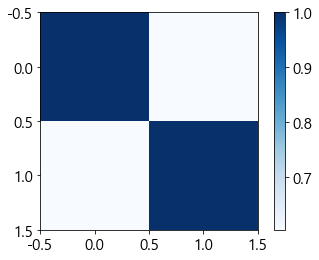

In [34]:
# 상관관계를 heatmap 으로 시각화--> heatmap : 색,농도 차이로 값의 차이를 시각화한다.// 상관관계 시각화
plt.imshow(corr, cmap= 'Blues')  #imshow : image show  // 'Blues' = 관계가 높으면 진한색, 낮으면 연한색 //다른 컬럼들 :같은값끼리 같은색 / cmap = color map
plt.colorbar()
plt.show()

In [35]:
df.corr()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
년도,1.000000,-0.706913,-0.612401,-0.582975,-0.501745,-0.201694,-0.733651
주의보 발령횟수,-0.706913,1.000000,0.975781,0.562544,0.566468,0.515552,0.735472
주의보 발령일수,-0.612401,0.975781,1.000000,0.468807,0.484182,0.477142,0.623823
경보 발령횟수,-0.582975,0.562544,0.468807,1.000000,0.968246,0.604161,0.587026
경보 발령일수,-0.501745,0.566468,0.484182,0.968246,1.000000,0.611976,0.645936
관측일수,-0.201694,0.515552,0.477142,0.604161,0.611976,1.000000,0.471453
최대농도,-0.733651,0.735472,0.623823,0.587026,0.645936,0.471453,1.000000


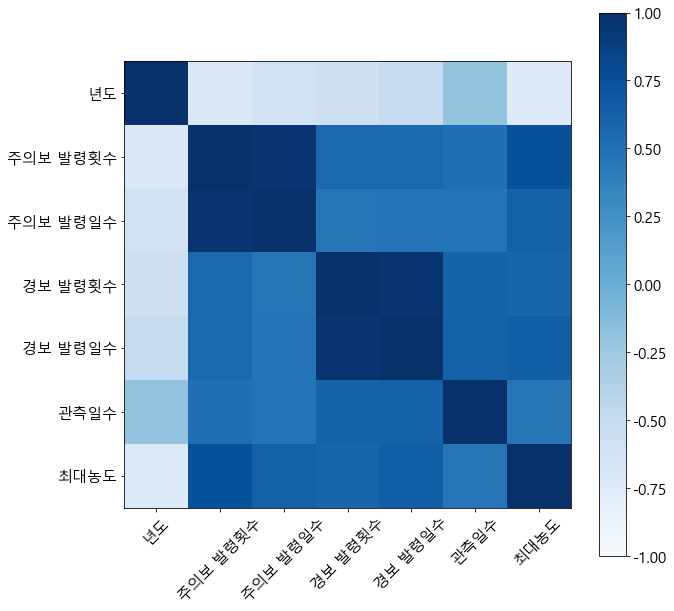

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(df.corr(), cmap = 'Blues', vmin = -1, vmax =1)

plt.yticks(ticks= range(df.columns.size), labels = df.columns)
plt.xticks(ticks= range(df.columns.size), labels = df.columns, rotation=45)

# 컬럼끼리의 상관관계를 확인~!/ 정확한 수치는 표로 확인하면되미
plt.colorbar()
plt.show()

In [37]:
plt.xticks?

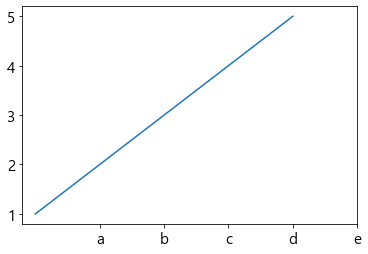

In [38]:
plt.plot([1,2,3,4,5])

plt.xticks(ticks =[1,2,3,4,5], labels = ['a','b','c','d','e'])
plt.show()

In [39]:
dia = pd.read_csv('data/diamonds.csv')
dia.shape

(53940, 10)

In [40]:
dia.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [41]:
dia['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

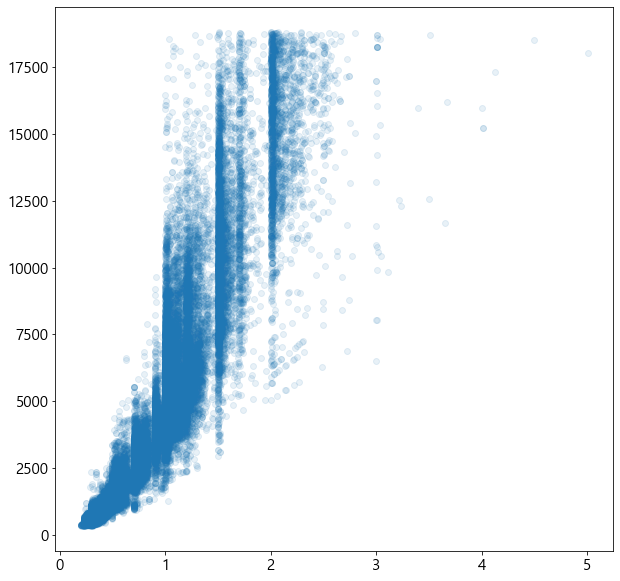

In [42]:
# carat 과 price간의 관계를 산점도로 시각화
plt.figure(figsize =(10,10))
plt.scatter(dia['carat'],dia['price'], alpha =0.1)
plt.show()  #  같은값을 갖는marker 는 같은 곳에 찍힌다.// 투명도를 조정해서 // 값이 실제 많은 부부을 알 수 있다.

In [43]:
dia[['carat','price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


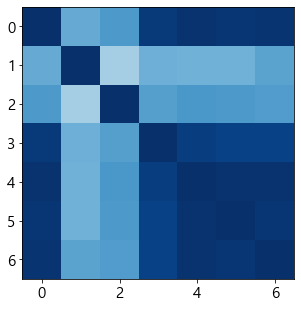

In [44]:
plt.figure(figsize=(5,5))
plt.imshow(dia.corr(), cmap = 'Blues', vmin = -1, vmax =1)


# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- axes.bar(x(범주형값), height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- axes.barh(y(범주형값), width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비    

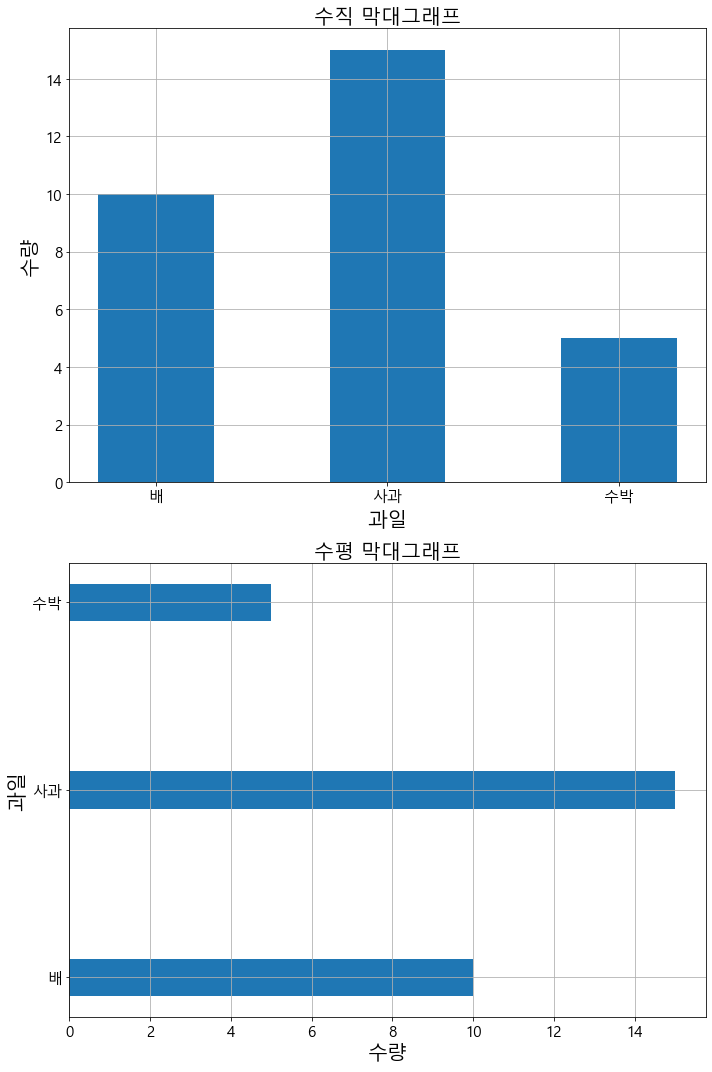

In [45]:
import matplotlib.pyplot as plt
import numpy as np

fruits= ['배','사과','수박']
amount= [10,15,5]

fig, axes = plt.subplots(2,1, figsize= (10,15))
axes[0].bar(fruits,amount, width =0.5)  # 0~1 사이 (기본 : 0.8)
axes[0].set_title('수직 막대그래프')
axes[0].set_xlabel('과일')
axes[0].set_ylabel('수량')
axes[0].grid(True)


axes[1].barh(fruits,amount, height = 0.2)
axes[1].set_title('수평 막대그래프')
axes[1].set_xlabel('수량')
axes[1].set_ylabel('과일')
axes[1].grid(True)

plt.tight_layout()
plt.show()




## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)


In [46]:
df = pd.read_excel('data/강수량.xlsx')
df.set_index('계절', inplace = True)
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


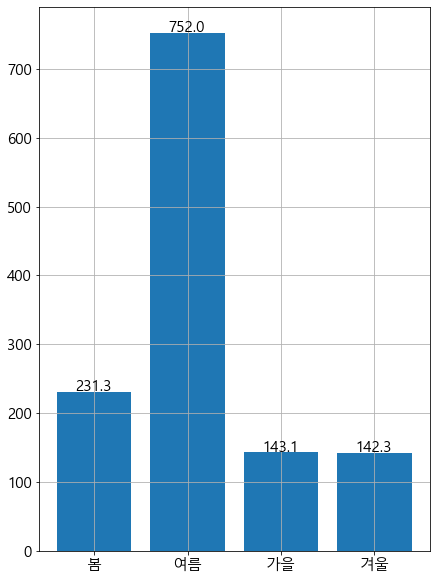

In [47]:
# 2009s년 계절별 강수량 
plt.figure(figsize=(7,10))

plt.bar(df.index,df[2009])
#xtick--> 숫자 날짜 타임만 들어가지만 // index 로넣어 줬을때 프로그램 내부에서 임의로 0,1,2,3 으로 해서 자리에 넣어줌 
# 그래프에선 실제 봄 이라기 보단  봄이라는 라벨을 붙여줌 실제는 (0)


for idx, rain in enumerate(df[2009]):
    plt.text(idx-0.2, rain+1, rain, fontsize = 15)
    
    #plt.text(  X,       Y,   text  ,fontsize= 15)
#plt.text(0-0.2,231.3+0.5,'231.3',fontsize= 15)#범주값이 0~시작

#xtick--> 숫자 날짜 타임


plt.grid(True)

plt.show()

In [48]:
for rain in df[2009]:
    print(rain)

231.3
752.0
143.1
142.3


In [49]:
df.info()

KeyError: 0

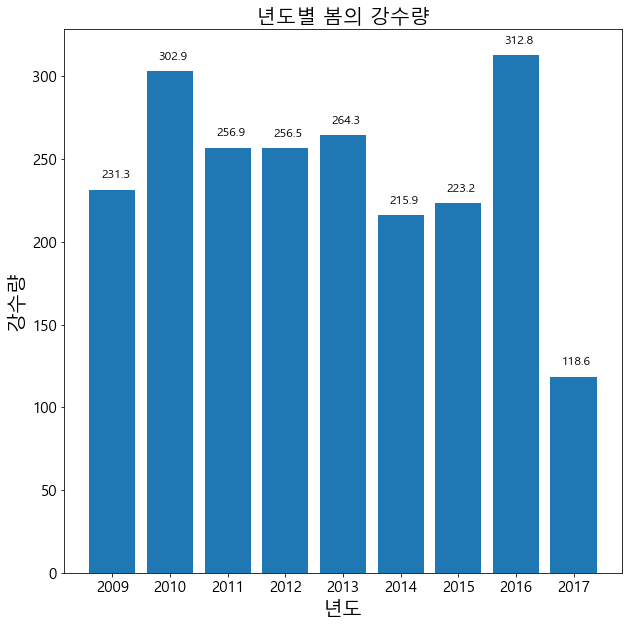

In [54]:
#년도별 봄의 강수량 
plt.figure(figsize=(10,10))

plt.bar(df.columns,df.loc['봄']) # index갖고오니까 .loc['봄']

plt.title('년도별 봄의 강수량')
plt.xlabel('년도')
plt.ylabel('강수량')
#text 넣어보기!

# df.info()---> 하면 왜 error 발생하는지

# for idx, x in enumerate(df.loc['봄']):
#     plt.text(idx, x+5, x, fontsize = 12)

#enumerate 를 쓰면 (0,231),(1,302.9).... 이런식으로 반환이 되어서 0~2009원래 그래프 자리까지 그래프를 그리게되서 너무 커져서 error 발생
# 그래프에 그리고 싶은 text 는 0에 그려지고 그래프는 2009에 있으니까 크게 그려지게됨.
# 그래서 zip을 사용해서 컬럼과 봄의 강수량을 짝지어서 text위치를 넣어준다.
    
# 틱이 숫자일때 실제 그자리 2009 자리에 그래프를 그리기 때문에 emumerate 를 사용하면 0위치에 텍스트를 그려넣어야 되니까 엑스축이 더 길어져서 
# 그래프가 너무 커진다.  df.columns ---> 숫자형태라서 숫자로 컨버터 되서 숫자자리에 틱이 만들어짐.
# 틱 라벨이 문자라면 ---> 실제 문자가 아니라 0,1,2,3, 인데 컨버터시켜서 문자로 보여줌
    
for idx, rain in zip(df.columns, df.loc['봄']):
    plt.text(idx-0.2, rain+7, rain, fontsize = 12)


# for idx, rain in enumerate(df.loc['봄'], start = 2009):
#     plt.text(idx-0.2,rain+0.5, rain, fontsize = 15)
    
    

plt.xticks(df.columns.astype('int'))  # df.columns 가 object 이므로  int로 바꿔줘야함 "ticks 는 숫자만 가능하니까"

plt.show()

In [51]:
for idx, rain in zip(df.columns, df.loc['봄']):
    plt.text(idx, rain+10, rain, fontsize = 12)

ValueError: Image size of 675362x70236 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

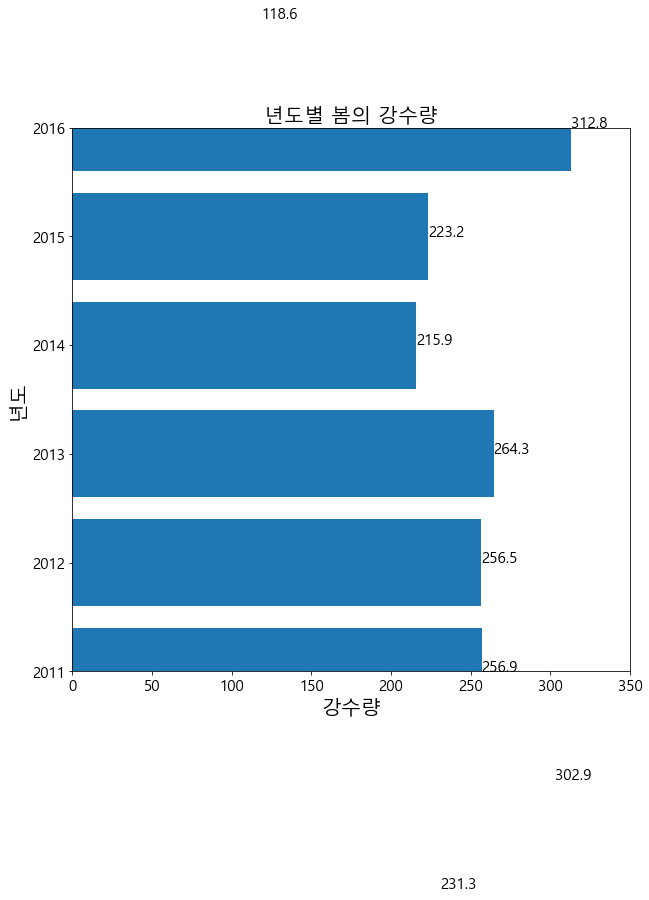

In [62]:
plt.figure(figsize=(10,10))

plt.barh(df.columns,df.loc['봄']) # index갖고오니까 .loc['봄']

plt.title('년도별 봄의 강수량')
plt.ylabel('년도')
plt.xlabel('강수량')
plt.yticks(df.columns.astype('int'))  # df.columns 가 object 이므로  int로 바꿔줘야함 "ticks 는 숫자만 가능하니까"
plt.xlim(0,350) # subplot 사이즈를 조정  xlimit
#plt.ylim(2011,2016)

#text 넣어보기!

for  rain,idx in enumerate(df.loc['봄'], start = 2009):  # 위에 수직으로 한것과 비교하기 
    plt.text(idx-0.2,rain+0, idx, fontsize = 15)



plt.show()

In [63]:
dia['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [64]:
clarity_cnt = dia['clarity'].value_counts()
print(clarity_cnt)
print(clarity_cnt[0])

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
13065


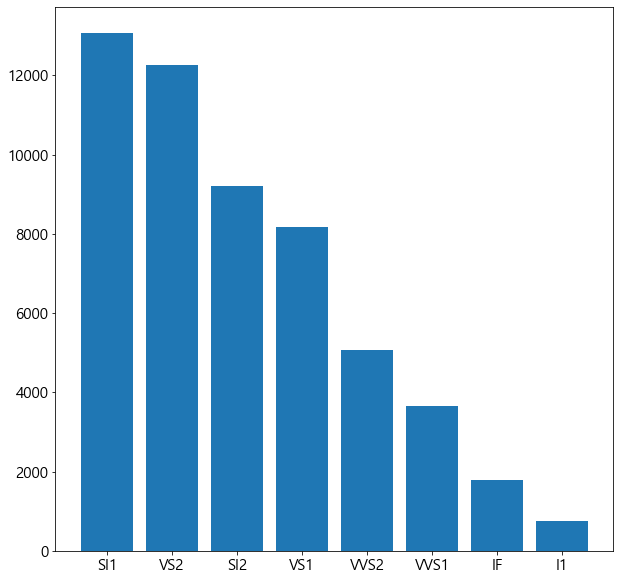

In [65]:
plt.figure(figsize = (10,10))
plt.bar(clarity_cnt.index,clarity_cnt)
plt.show()